# Static image generation
As of plotly.py version 3.2, it possible to export figures as high quality static images without making API requests to the plot.ly image servers.

## Install dependencies
Static image generation requires the [orca](https://github.com/plotly/orca) commandline utility and the [psutil](https://github.com/giampaolo/psutil) Python library. There are 3 general approach to installing these dependencies.

### conda
Using the [conda](https://conda.io/docs/) package manager, you can install these dependencies in a single command:
```
$ conda install -c plotly-orca psutil
```

**Note:** Even if you don't want to use conda to manage your Python dependencies, it is still useful as a cross platform tool for managing native libraries and command-line utilities (e.g. git, wget, graphviz, boost, gcc, nodejs, cairo, etc.).  For this use-case, start with [Miniconda](https://conda.io/miniconda.html) (~60MB) and tell the installer to add itself to your system `PATH`.  Then run `conda install plotly-orca` and the orca executable will be available system wide.

### npm + pip
You can use the [npm](https://www.npmjs.com/get-npm) package manager to install `orca` (and its `electron` dependency), and then use pip to install `psutil`:

```
$ npm install -g electron@1.8.4 orca
$ pip install psutil
```

### Standalone binaries + pip
If you are unable or unwilling to install conda or npm, you can install orca as a precompiled binary for your operating system. Follow the instructions in the orca [README](https://github.com/plotly/orca) to install orca and add it to your system `PATH`. Then use pip to install `psutil`.

```
$ pip install psutil
```

## Create a figure
Now let's create a simple scatter plot with 100 random points of variying color and size.

In [1]:
import plotly.graph_objs as go
import plotly.io as pio
import os
import numpy as np

N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N)*30

fig = go.FigureWidget()
fig.add_scatter(x=x,
                y=y,
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
fig

FigureWidget({
    'data': [{'marker': {'color': array([0.25279285, 0.56545794, 0.28087004, 0.45217632, 0.4224…

## Write image file
The `plotly.io.write_image` function is used to write an image to a file or file-like python object.

Let's first create an output directory to store our images

In [2]:
if not os.path.exists('images'):
    os.mkdir('images')

If you are running this notebook live, click to [open the output directory](./images) so you can examine the images as they're written.

### Raster formats: PNG, JPEG, and WebP

Orca can output figures to several raster image formats including **PNG**, ...

In [3]:
pio.write_image(fig, 'images/fig1.png')

**JPEG**, ...

In [4]:
pio.write_image(fig, 'images/fig1.jpeg')

and **WebP**

In [5]:
pio.write_image(fig, 'images/fig1.webp')

### Vector formats: SVG and PDF...

Orca can also output figures in several vector formats including **SVG**, ...

In [6]:
pio.write_image(fig, 'images/fig1.svg')

**PDF**, ...

In [7]:
pio.write_image(fig, 'images/fig1.pdf')

and **EPS** (requires the poppler library)

In [8]:
pio.write_image(fig, 'images/fig1.eps')

## Get image as bytes
The `plotly.io.to_image` function is used to return an image as a bytes object.

Let convert the figure to a **PNG** bytes object...

In [9]:
img_bytes = pio.to_image(fig, format='png')

and then display the first 20 bytes.

In [10]:
img_bytes[:20]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xbc'

### Display bytes as image using `IPython.display.Image`
A bytes object representing a PNG image can be displayed directly in the notebook using the `IPython.display.Image` class. This also works in the [Qt Console for Jupyter](https://qtconsole.readthedocs.io/en/stable/)!

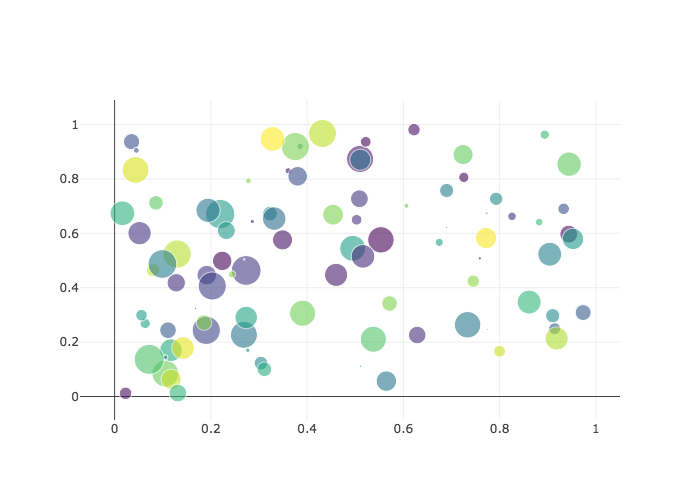

In [11]:
from IPython.display import Image
Image(img_bytes)

## Change image dimensions and scale
In addition to the image format, the `to_image` and `write_image` functions provide arguments to specify the image `width` and `height` in logical pixels. They also provide a `scale` parameter that can be used to increase (`scale` > 1) or decrease (`scale` < 1) the physical resolution of the resulting image.

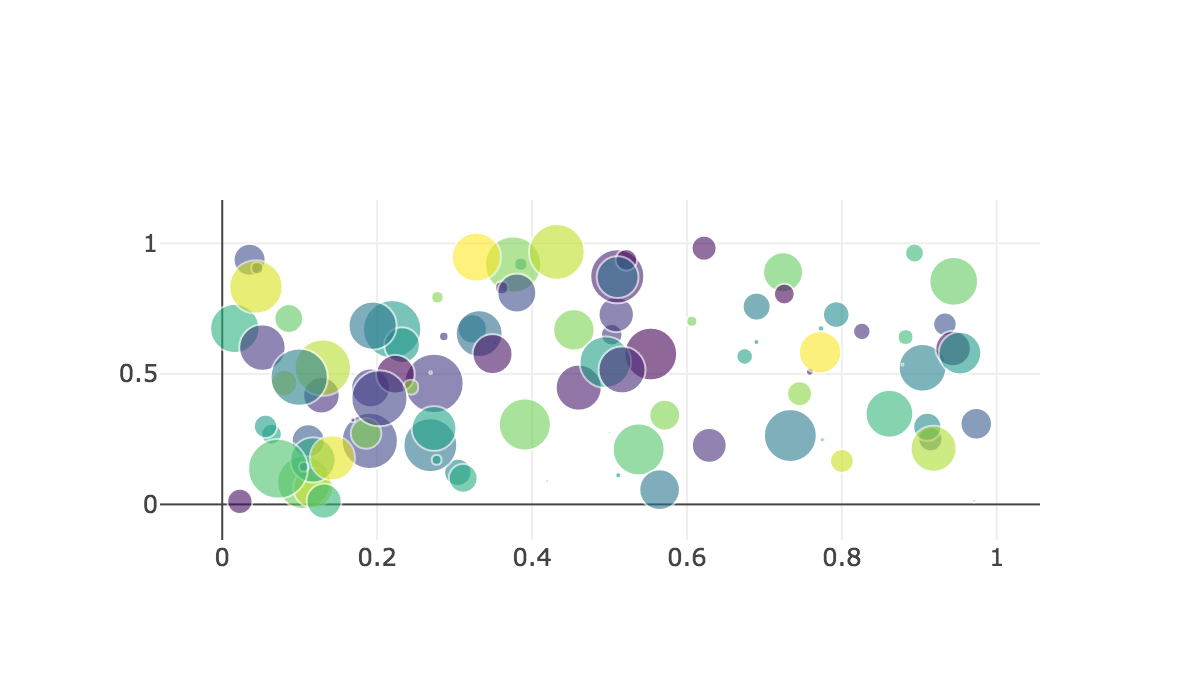

In [12]:
img_bytes = pio.to_image(fig, format='png', width=600, height=350, scale=2)
Image(img_bytes)

## Summary
In summary, to export high-quality static images from plotly.py all you need to do is install orca and psutil and then use the `plotly.io.write_image` and `plotly.io.to_image` functions.

If you want to know more about how the orca integration works, or if you need to troubleshoot an issue, please check out the [Orca Management](OrcaManagement.ipynb) section.